In [38]:
import tensorflow as tf
print("TensorFlow version:",tf.__version__)

TensorFlow version: 2.0.0


In [39]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

TRAIN_URL = "http://download.tensorflow.org/data/iris_training.csv"
train_path = tf.keras.utils.get_file(TRAIN_URL.split('/')[-1],TRAIN_URL)

TEST_URL = "http://download.tensorflow.org/data/iris_test.csv"
test_path = tf.keras.utils.get_file(TEST_URL.split('/')[-1],TEST_URL)

In [40]:
df_iris_train = pd.read_csv(train_path,header=0)
df_iris_test = pd.read_csv(test_path,header=0)

iris_train=np.array(df_iris_train)
iris_test=np.array(df_iris_test)

iris_train.shape,iris_test.shape

((120, 5), (30, 5))

In [41]:
train_x=iris_train[:,0:2]
train_y=iris_train[:,4]

test_x=iris_test[:,0:2]
test_y=iris_test[:,4]

train_x.shape,train_y.shape

((120, 2), (120,))

In [42]:
test_x.shape,test_y.shape

((30, 2), (30,))

In [43]:
x_train = train_x[train_y>0]
y_train = train_y[train_y>0]

x_train.shape,y_train.shape

((78, 2), (78,))

In [44]:
x_test = test_x[test_y>0]
y_test = test_y[test_y>0]

x_test.shape,y_test.shape

((22, 2), (22,))

In [45]:
num_train=len(x_train)
num_test=len(x_test)

num_train,num_test

(78, 22)

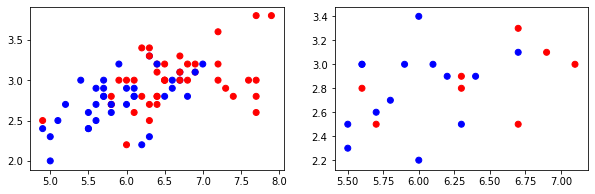

In [46]:
plt.figure(figsize=(10,3))
cm_pt = mpl.colors.ListedColormap(["blue","red"])

plt.subplot(121)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt)

plt.subplot(122)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap=cm_pt)

plt.show()

In [47]:
print(np.mean(x_train,axis=0))
print(np.mean(x_test,axis=0))

[6.3025641  2.88717949]
[6.11818182 2.81818182]


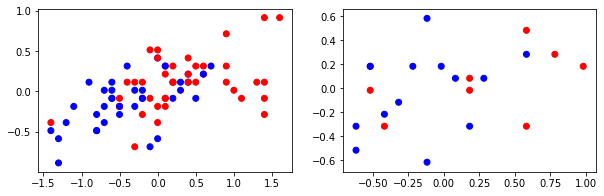

In [48]:
x_train=x_train-np.mean(x_train,axis=0)
x_test=x_test-np.mean(x_test,axis=0)

plt.figure(figsize=(10,3))

plt.subplot(121)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt)

plt.subplot(122)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap=cm_pt)

plt.show()

In [49]:
x0_train = np.ones(num_train).reshape(-1,1)

X_train = tf.cast(tf.concat((x0_train,x_train),axis = 1),dtype=tf.float32)
Y_train = tf.cast(y_train.reshape(-1,1),dtype=tf.float32)

X_train.shape,Y_train.shape

(TensorShape([78, 3]), TensorShape([78, 1]))

In [50]:
x0_test = np.ones(num_test).reshape(-1,1)

X_test = tf.cast(tf.concat((x0_test,x_test),axis = 1),dtype=tf.float32)
Y_test = tf.cast(y_test.reshape(-1,1),dtype=tf.float32)

X_test.shape,Y_test.shape

(TensorShape([22, 3]), TensorShape([22, 1]))

In [51]:
learn_rate=0.2
iter=120
display_step=30

np.random.seed(612)
W=tf.Variable(np.random.randn(3,1),dtype=tf.float32)

In [52]:
ce_train=[]
ce_test=[]
acc_train=[]
acc_test=[]

for i in range(0,iter+1):
    with tf.GradientTape() as tape:
        PRED_train =1/(1+tf.exp(-tf.matmul(X_train,W)))
        Loss_train =-tf.reduce_mean(Y_train*tf.math.log(PRED_train)+(1-Y_train)*tf.math.log(1-PRED_train))
        PRED_test =1/(1+tf.exp(-tf.matmul(X_test,W)))
        Loss_test =-tf.reduce_mean(Y_test*tf.math.log(PRED_test)+(1-Y_test)*tf.math.log(1-PRED_test))
        
    accuracy_train = tf.reduce_mean(tf.cast(tf.equal(tf.where(PRED_train.numpy()<0.5,0.,1.),Y_train),tf.float32))
    accuracy_test = tf.reduce_mean(tf.cast(tf.equal(tf.where(PRED_test.numpy()<0.5,0.,1.),Y_test),tf.float32))
    
    ce_train.append(Loss_train)
    ce_test.append(Loss_test)
    acc_train.append(accuracy_train)
    acc_test.append(accuracy_test)
    
    dL_dW= tape.gradient(Loss_train,W)
    W.assign_sub(learn_rate*dL_dW)
    
    if i % display_step == 0:
        print("i: %i, TrainAcc:%f, TrainLoss: %f,TestAcc:%f, TestLoss: %f" % (i,accuracy_train,Loss_train,accuracy_test,Loss_test))

i: 0, TrainAcc:0.333333, TrainLoss: 1.005264,TestAcc:0.363636, TestLoss: 0.873245
i: 30, TrainAcc:0.461538, TrainLoss: -2.234556,TestAcc:0.636364, TestLoss: -1.498605
i: 60, TrainAcc:0.461538, TrainLoss: -4.202284,TestAcc:0.636364, TestLoss: -2.815356
i: 90, TrainAcc:0.461538, TrainLoss: -6.139918,TestAcc:0.636364, TestLoss: -4.107800


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


i: 120, TrainAcc:0.461538, TrainLoss: nan,TestAcc:0.636364, TestLoss: nan


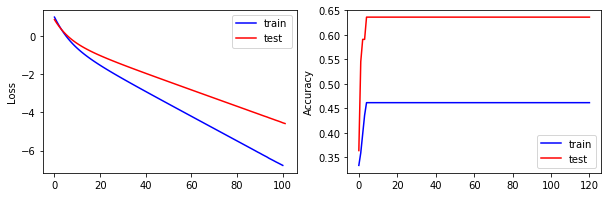

In [53]:
plt.figure(figsize=(10,3))

plt.subplot(121)
plt.plot(ce_train,color="blue",label="train")
plt.plot(ce_test,color="red",label="test")
plt.ylabel("Loss")
plt.legend()

plt.subplot(122)
plt.plot(acc_train,color="blue",label="train")
plt.plot(acc_test,color="red",label="test")
plt.ylabel("Accuracy")
plt.legend()
plt.show()